In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import numpy as np

import warnings
warnings.simplefilter("ignore", UserWarning)

%matplotlib inline

In [3]:
from PIL import Image, ImageColor, ImageFont, ImageDraw, ImageFilter

In [4]:
# import DL stuff
import torch
import torch.nn as nn

import torch.functional as F
from torch.autograd import Variable as V

import tensorflow as tf

slim = tf.contrib.slim


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [5]:
print('tf:', tf.__version__, '\n\r', 'torch:', torch.__version__)

tf: 1.12.0 
 torch: 1.0.0


In [8]:
def generate_horizontal_text(text, font, text_color, font_size, space_width):
        image_font = ImageFont.truetype(font=font, size=font_size)
        
        words = text.split(' ')
        
        space_width = image_font.getsize(' ')[0] * space_width

        words_width = [image_font.getsize(w)[0] for w in words]
        text_width =  sum(words_width) + int(space_width) * (len(words) - 1)
        text_height = max([image_font.getsize(w)[1] for w in words])

        txt_img = Image.new('RGBA', (text_width, text_height), (0, 0, 0, 0))

        txt_draw = ImageDraw.Draw(txt_img)

        colors = [ImageColor.getrgb(c) for c in text_color.split(',')]
        c1, c2 = colors[0], colors[-1]

        fill = (
            random.randint(c1[0], c2[0]),
            random.randint(c1[1], c2[1]),
            random.randint(c1[2], c2[2])
        )

        for i, w in enumerate(words):
            image_font = ImageFont.truetype(font=font, size=font_size)
            txt_draw.text((sum(words_width[0:i]) + i * int(space_width), 0), w, fill=fill, font=image_font)

        return txt_img

In [12]:
img = generate_horizontal_text(text='asdadas\n dddas ', 
                               font='Ubuntu', 
                               font_size=14, 
                               space_width=1.3, 
                               text_color='black')

OSError: cannot open resource

In [ ]:
ImageFont.truetype

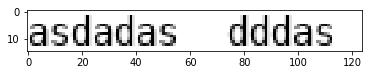

In [22]:
plt.imshow(img)

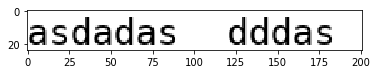

In [24]:
img = generate_horizontal_text(text='asdadas\n dddas ', 
                               font='Menlo', 
                               font_size=22, 
                               space_width=1.3, 
                               text_color='black')
plt.imshow(img)

In [32]:
import torch
import tensorflow as tf

slim = tf.contrib.slim

In [43]:
import cv2
import numpy as np

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('/Users/mac/code/text-detection-ctpn/data/demo/legal-documents-650x405.jpg')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

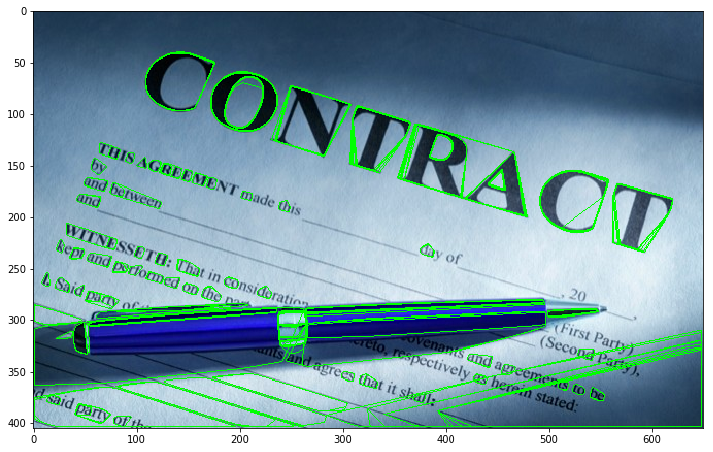

In [44]:
plt.figure(figsize=(12,12))
plt.imshow(vis)

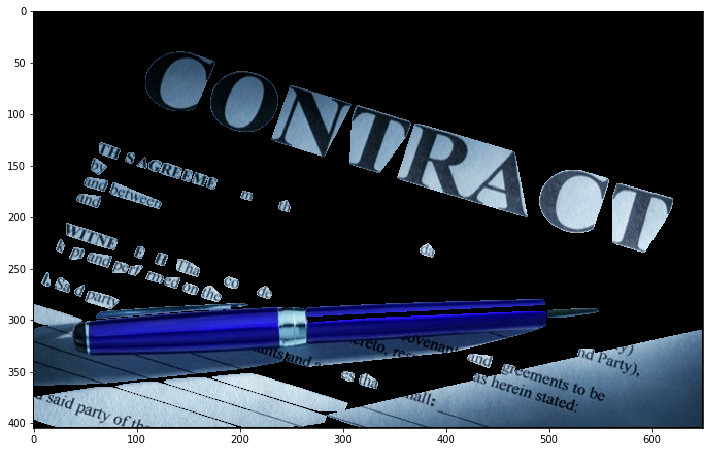

In [45]:
plt.figure(figsize=(12,12))
plt.imshow(text_only)

In [49]:
import imutils

In [65]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 10, 50)
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
screenCnt = None
print(len(cnts))
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # print(approx)
    print(len(approx))
    if len(approx) == 4:
        screenCnt = approx
        print('4')
        break

cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)

5
12
12
8
8
9


array([[[ 31,  57,  81],
        [ 33,  59,  83],
        [ 36,  60,  84],
        ...,
        [ 49,  77, 107],
        [ 50,  80, 109],
        [ 50,  80, 109]],

       [[ 30,  56,  80],
        [ 32,  58,  82],
        [ 35,  59,  83],
        ...,
        [ 49,  77, 107],
        [ 50,  80, 109],
        [ 50,  80, 109]],

       [[ 30,  56,  80],
        [ 31,  57,  81],
        [ 34,  58,  82],
        ...,
        [ 48,  76, 106],
        [ 50,  80, 109],
        [ 50,  80, 109]],

       ...,

       [[142, 173, 194],
        [152, 183, 204],
        [155, 186, 207],
        ...,
        [ 28,  51,  73],
        [ 28,  51,  73],
        [ 28,  51,  73]],

       [[145, 176, 197],
        [147, 178, 199],
        [150, 181, 202],
        ...,
        [ 28,  51,  73],
        [ 27,  50,  72],
        [ 27,  50,  72]],

       [[146, 175, 196],
        [141, 170, 191],
        [142, 173, 194],
        ...,
        [ 29,  52,  74],
        [ 29,  52,  74],
        [ 29,  52,  74]]

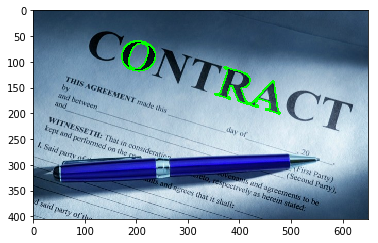

In [66]:
plt.imshow(img)

In [67]:
torch.sum

<function _VariableFunctions.sum>

In [68]:
torch.abs

<function _VariableFunctions.abs>

In [70]:
img = mimg.imread('../OCR/data/mlt/image/100_icdar13.png')
with open('../OCR/data/mlt/label/100_icdar13.txt') as f:
    data = f.readlines()

In [100]:
img_ = img
for line in data:
    pts = np.asarray(line.split(','), np.uint8)
    cv2.rectangle(img_, (pts[1], pts[0]), (pts[3], pts[2]), (0,255,255))

In [102]:
data

['201,162,207,229\n',
 '208,162,223,229\n',
 '224,162,239,229\n',
 '240,162,255,229\n',
 '256,162,271,229\n',
 '272,162,287,229\n',
 '288,162,303,229\n',
 '304,162,319,229\n',
 '320,162,335,229\n',
 '336,162,351,229\n',
 '352,162,367,229\n',
 '368,162,383,229\n',
 '384,162,399,229\n',
 '400,162,415,229\n',
 '416,162,431,229\n',
 '432,162,447,229\n',
 '448,162,463,229\n',
 '464,162,479,229\n',
 '480,162,495,229\n',
 '496,162,511,229\n',
 '512,162,527,229\n',
 '564,162,575,214\n',
 '576,162,591,214\n',
 '592,162,607,214\n',
 '608,162,623,214\n',
 '624,162,639,214\n',
 '81,253,95,307\n',
 '96,253,111,307\n',
 '112,253,127,307\n',
 '128,253,143,307\n',
 '144,253,159,307\n',
 '160,253,175,307\n',
 '176,253,191,307\n',
 '192,253,207,307\n',
 '208,253,223,307\n',
 '224,253,239,307\n',
 '240,253,255,307\n',
 '256,253,271,307\n',
 '272,253,287,307\n',
 '288,253,303,307\n',
 '304,253,319,307\n',
 '320,253,335,307\n',
 '336,253,351,307\n',
 '352,253,367,307\n',
 '368,253,383,307\n',
 '384,253,399

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


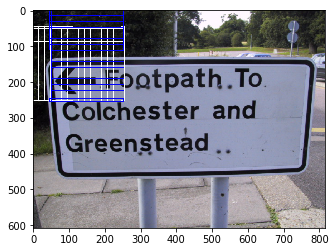

In [99]:
plt.imshow(img_)

In [78]:
pts = map(int(), data[1])

In [79]:
pts

In [85]:
np.asarray(data[1].split(','), np.uint8)

array([208, 162, 223, 229], dtype=uint8)

In [83]:
int(data[1].split(','))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [109]:
import string

In [115]:
def data_parallel(model, input, ngpu):
    if isinstance(input.data, torch.cuda.FloatTensor) and ngpu > 1:
        output = nn.parallel.data_parallel(model, input, range(ngpu))
    else:
        output = model(input)
    return output

def weights_init(m):
    if type(m) == nn.Conv2d:
        nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)
    elif type(m) == nn.BatchNorm2d:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)
        
import string
alphabet = string.ascii_letters + string.digits + "'!,-:;<=>?"

In [116]:
alphabet

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'!,-:;<=>?"

In [93]:
class ConvRelu(nn.Module):
    def __init__(self, nin, nout, k, s, p, bn=False):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 
                              kernel_size=k, 
                              stride=s, 
                              padding=p)
        self.activation = nn.ReLU(inplace=True)
        self.bn = nn.BatchNorm2d(nout)
        self.bn_ = bn

    def forward(self, x):
        x = self.conv(x)
        if self.bn_:
            x = self.bn(x)
        x = self.activation(x)
        return x

In [102]:
if torch.cuda.is_available():
    torch.cuda.device_count()

In [103]:
class LSTM(nn.Module):
    def __init__(self, nin, nh, nout):
        super(LSTM, self).__init__()
        self.rnn = nn.LSTM(nin, nh, bidirectional=True)
        self.embedding = nn.Linear(nh * 2, nout)
        if torch.cuda.is_available():
            self.ngpu = torch.cuda.device_count()

    def forward(self, input):
        recurrent, _ = data_parallel(
            self.rnn, input, self.ngpu)  # [T, b, h * 2]
        T, b, h = recurrent.size()
        t_rec = recurrent.view(T * b, h)

        output = self.embedding(t_rec)  # [T * b, nOut]
        output = output.view(T, b, -1)

        return output

In [104]:
# model = crnn.CRNN(32, 1, len(alphabet) + 1, 256, 1).cuda()

In [105]:
class CRNN(nn.Module):
    def __init__(self, c, nc, nh):
        super(CRNN, self).__init__()
        layers = [ConvRelu(c, 64, 3, 1, 1),
                 nn.MaxPool2d(2,2),
                 ConvRelu(64, 128, 3, 1, 1),
                 nn.MaxPool2d(2,2),
                 ConvRelu(128, 256, 3, 1, 1, True),
                 ConvRelu(256, 256, 3, 1, 1),
                 nn.MaxPool2d((2,2),(2,1),(0,1)),
                 ConvRelu(256, 512, 3, 1, 1, True),
                 ConvRelu(512, 512, 3, 1, 1),
                 nn.MaxPool2d((2,2), (2,1), (0,1)),
                 ConvRelu(512, 512, 2, 1, 0, True),
                 ]
        
        self.cnn = nn.Sequential(*layers)
        # self.cnn.apply(init_weights)
        self.rnn = nn.Sequential(LSTM(512, nh, nh),
                                LSTM(nh, nh, nc))
        # self.rnn.apply(init_weights)
    
    def forward(self, x):
        x = self.cnn(x)
        print(x.size())
        b, c, h, w = x.size()
        x = x.squeeze(2)
        x = x.permute(2, 0, 1)
        x = self.rnn(x)
        print(x.size())
        return x

In [106]:
def weights_init(m):
    if type(m) == nn.Conv2d:
        nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)
    elif type(m) == nn.BatchNorm2d:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [107]:
H = 32
W = 280
C = 1
net = CRNN(C, nc=32, nh=128)
net.apply(weights_init)
X = V(torch.randn(1, C, H, W))
Y_ = net(X)

torch.Size([1, 512, 1, 71])
torch.Size([71, 1, 32])


In [ ]:
opt = nn.CTCLoss(

In [200]:
16 * 7

112

In [48]:
class AttrDict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    
def define_config():
    config = AttrDict()
    config.n_classes = 34
    config.lstm_size = 256
    config.width = 280
    config.height = 32
    return config

In [49]:
cfg

{'n_classes': 34, 'lstm_size': 256}

In [59]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.contrib.rnn import BasicLSTMCell

import numpy as np

tf.enable_eager_execution()

slim = tf.contrib.slim
cfg = define_config()

def cnn(inputs, scope='vgg', is_training=True):
    batch_norm_params = {'is_training': is_training}
    with slim.arg_scope([slim.conv2d], 
                        normalizer_fn=slim.batch_norm, 
                        normalizer_params=batch_norm_params,):
        with slim.arg_scope([slim.batch_norm], **batch_norm_params):
            net = slim.repeat(
                inputs, 1, 
                slim.conv2d, 
                64, [3, 3], 
                scope='conv1',
            )
            net = slim.max_pool2d(net, [2, 2], scope='pool1')
            net = slim.repeat(net, 1, slim.conv2d, 128, [3, 3], scope='conv2')
            net = slim.max_pool2d(net, [2, 2], scope='pool2', padding='SAME')
            net = slim.repeat(net, 2, slim.conv2d, 256, [3, 3], scope='conv3')
            net = slim.max_pool2d(net, [2, 2], stride=[2, 1], scope='pool3', padding='SAME')
            net = slim.repeat(net, 2, slim.conv2d, 512, [3, 3], scope='conv4')
            net = slim.max_pool2d(net, [2, 2], stride=[2, 1], scope='pool4', padding='SAME')
            net = slim.repeat(net, 1, slim.conv2d, 512, [3, 3], scope='conv5')
            return net


def crnn(images, is_training=True):
    dropout_keep_prob = 0.7 if is_training else 1.0
    cnn_net = cnn(images, is_training=is_training)
    with tf.variable_scope('Reshaping_cnn'):
        shape = cnn_net.get_shape().as_list()  # [batch, height, width, features]
        transposed = tf.transpose(cnn_net, perm=[0, 2, 1, 3],
                                  name='transposed')  # [batch, width, height, features]
        conv_reshaped = tf.reshape(transposed, [shape[0], -1, shape[1] * shape[3]],
                                   name='reshaped')  # [batch, width, height x features]

    list_n_hidden = [cfg.lstm_size, cfg.lstm_size]

    with tf.name_scope('deep_bidirectional_lstm'):
        # Forward direction cells
        fw_cell_list = [BasicLSTMCell(nh, forget_bias=1.0) for nh in list_n_hidden]
        # Backward direction cells
        bw_cell_list = [BasicLSTMCell(nh, forget_bias=1.0) for nh in list_n_hidden]

        lstm_net, _, _ = tf.contrib.rnn.stack_bidirectional_dynamic_rnn(fw_cell_list,
                                                                        bw_cell_list,
                                                                        conv_reshaped,
                                                                        dtype=tf.float32
                                                                        )
        # Dropout layer
        lstm_net = tf.nn.dropout(lstm_net, keep_prob=dropout_keep_prob)
        #logging.info('after lstm shape: %s' % lstm_net.shape)

    with tf.variable_scope('fully_connected'):
        shape = lstm_net.get_shape().as_list()  # [batch, width, 2*n_hidden]
        fc_out = slim.layers.linear(lstm_net, cfg.n_classes)  # [batch x width, n_class]
        #logging.info('fc_out shape: %s' % fc_out.shape)

        lstm_out = tf.reshape(fc_out, [shape[0], -1, cfg.n_classes],
                              name='lstm_out')  # [batch, width, n_classes]
        #logging.info('lstm_out shape: %s' % lstm_out.shape)

        # Swap batch and time axis
        logprob = tf.transpose(lstm_out, [1, 0, 2], name='transpose_time_major')  # [width(time), batch, n_classes]

        return logprob


def create_loss(sparse_code_target, logprob, seq_len_inputs):
    with tf.control_dependencies(
            [tf.less_equal(sparse_code_target.dense_shape[1], tf.reduce_max(tf.cast(seq_len_inputs, tf.int64)))]):
        loss_ctc = tf.nn.ctc_loss(labels=sparse_code_target,
                                  inputs=logprob,
                                  sequence_length=tf.cast(seq_len_inputs, tf.int32),
                                  ignore_longer_outputs_than_inputs=True,
                                 )
        loss_ctc = tf.reduce_mean(loss_ctc)
    return loss_ctc

In [60]:
ret = crnn(np.random.rand(1,224,64,3).astype(np.float32))

W0211 16:57:17.981990 140354946066176 tf_logging.py:161] <tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fa648325710>: Note that this cell is not optimized for performance. Please use tf.contrib.cudnn_rnn.CudnnLSTM for better performance on GPU.
W0211 16:57:17.984064 140354946066176 tf_logging.py:161] <tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fa648325940>: Note that this cell is not optimized for performance. Please use tf.contrib.cudnn_rnn.CudnnLSTM for better performance on GPU.
W0211 16:57:17.985587 140354946066176 tf_logging.py:161] <tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fa648325208>: Note that this cell is not optimized for performance. Please use tf.contrib.cudnn_rnn.CudnnLSTM for better performance on GPU.
W0211 16:57:17.987194 140354946066176 tf_logging.py:161] <tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x7fa6483255c0>: Note that this cell is not optimized for performance. Please use tf.contrib.cud

In [61]:
ret.shape

TensorShape([Dimension(16), Dimension(1), Dimension(34)])

In [ ]:
def encode(text):
    if isinstance(text, str):
        te